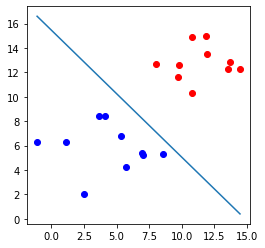

[[0.69314718]]


In [113]:
import numpy as np 
import matplotlib.pyplot as plt

def draw(x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return 1/(1 + np.exp(-score))
    
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T * (1-y))
    
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]

    for i in range(500):
        p = sigmoid(points*line_parameters)
        gradient = (points.T * (p - y))*(alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        
        x1 = np.array([ points[:,0].min(), points[:,0].max()])
#w1x1 + w2x2 + b = 0

        x2 = -b /w2 + x1 * (-w1/w2)
    
    draw(x1, x2)

n_pts = 10

np.random.seed(0)

bias = np.ones(n_pts)

random_x1_values = np.random.normal(10, 2, n_pts)
random_x2_values = np.random.normal(12,2,n_pts)
top_region = np.array([random_x1_values, random_x2_values, bias]).T
bottom_region = np.array([np.random.normal(4,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T
#x1 = np.array([ bottom_region[:,0].min(), top_region[:,0].max()])
#w1x1 + w2x2 + b = 0

#x2 = -b /w2 + x1 * (-w1/w2)


linear_combination = all_points * line_parameters
probabilities = sigmoid(linear_combination)

y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)



_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()

print(calculate_error(line_parameters, all_points, y))

